In [5]:
import numpy as np
import warnings
import sys
import pandas as pd
import scipy
from scipy.io import arff
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [6]:
data, meta = scipy.io.arff.loadarff('mtr-datasets/enb.arff')
data = pd.DataFrame(data)
data.head()

,Relative_compactness,X1,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [7]:
target = data.iloc[:,-2:]
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = target.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(target.values, i) 
                          for i in range(len(target.columns))] 
  
print(vif_data)

  feature        VIF
0      Y1  97.707453
1      Y2  97.707453


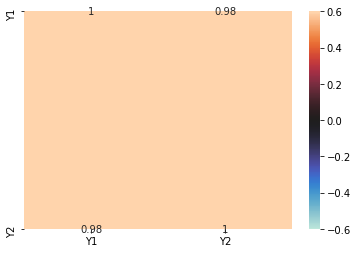

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
corr = target.corr()

sns.heatmap(corr, annot = True, vmin=-0.6, vmax=0.6, center= 0)